In [179]:
import os, shutil, random
import json
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
from PIL import Image
from matplotlib import pyplot as plt
import urllib.request
%matplotlib inline

In [156]:
stl_dataset = "/Users/shameekphukan/Documents/LSE/ST456/2025-projects-the-gradient-descendants/data"
files = [os.path.join(stl_dataset, x) for x in os.listdir(stl_dataset) if x.endswith(".json")]

In [157]:
files

['/Users/shameekphukan/Documents/LSE/ST456/2025-projects-the-gradient-descendants/data/fashion-cat.json',
 '/Users/shameekphukan/Documents/LSE/ST456/2025-projects-the-gradient-descendants/data/home-cat.json',
 '/Users/shameekphukan/Documents/LSE/ST456/2025-projects-the-gradient-descendants/data/fashion.json',
 '/Users/shameekphukan/Documents/LSE/ST456/2025-projects-the-gradient-descendants/data/home.json']

In [158]:
with open(files[0], "r") as f:
    fashion_cat = json.load(f)
    
with open(files[1], "r") as f:
    home_cat = json.load(f)

with open(files[2], 'r') as f:
    fashion = [json.loads(line) for line in f if line.strip()]

with open(files[3], 'r') as f:
    home = [json.loads(line) for line in f if line.strip()]

In [159]:
fashion = pd.DataFrame(fashion)
home = pd.DataFrame(home)

In [160]:
type(home_cat)

dict

In [161]:
type(fashion_cat)

dict

In [162]:
fashion

product                             scene  \
0      0027e30879ce3d87f82f699f148bff7e  cdab9160072dd1800038227960ff6467   
1      0027e30879ce3d87f82f699f148bff7e  14f59334af4539132981b1324a731067   
2      0027e30879ce3d87f82f699f148bff7e  e7d32df9f45b691afc580808750f73ca   
3      0027e30879ce3d87f82f699f148bff7e  c0be585ed21b1a6c6dc9559ebe007ede   
4      002a6586b8381b5efd39410657630b44  67ed2a06be8a26dc63d7a04d4e1a135f   
...                                 ...                               ...   
72193  f47eacd512acfdcfaf5f402809acb333  0a8d63baa456499a3dd2c4886385cf13   
72194  f47eacd512acfdcfaf5f402809acb333  31e3620642773bfeac3e9d1a4976205c   
72195  f940d17f294fec78c913e9536735bea1  cc764ccff4d6e1abb3ea1ecc1503f8bf   
72196  fd8de790fe45ef01ebc8fe47a6e80138  a1f27a961c577230d0cea68f6e59b36a   
72197  ff3f110f702999cafb48958e37365900  f8b511621ffd30eefd5af251012e9934   

                                           bbox  
0           [0.434097, 0.859363, 0.560254, 1.0]  
1      [0.175269, 0.527773, 0.621485, 0.924899]  
2      [0.588666, 0.638503, 0.750647, 0.761368]  
3      [0.276699, 0.757741, 0.400485, 0.876138]  
4      [0.154545, 0.144809, 0.809091, 0.784153]  
...                                         ...  
72193      [0.456818, 0.343636, 0.75, 0.629091]  
72194    [0.378297, 0.6209, 0.790087, 0.982056]  
72195  [0.627266, 0.456562, 0.823383, 0.654216]  
72196   [0.235259, 0.824805, 0.39719, 0.974153]  
72197   [0.302811, 0.281136, 0.64136, 0.672962]  

[72198 rows x 3 columns]

In [163]:
home

product                             scene  \
0      01af7c73a89bfaa01e50024fe251fdb8  3a3fc37d027d1ccfd1170f823c3b0f0e   
1      01d4d2f30b36b3f6077c3f69ebb8eef8  2c4f93b348efbaa2c8c01296b996af91   
2      01d4d2f30b36b3f6077c3f69ebb8eef8  c5bd944bfb21e21287ed8dab85d68c33   
3      01d4d2f30b36b3f6077c3f69ebb8eef8  e70e8fd67c576aa00679a5dc6f018c9a   
4      0421ad3a3ae80cc6cebf6de3e5b38185  b92e37c20732d3f50834a24579818ad4   
...                                 ...                               ...   
93269  f055533bbb1a59258ba91e00d62888ed  0421b074714fde192a981b15b4da096c   
93270  f16bda2d921d2c15074396f056be6ea9  8567df44289efa2073a621434008f6a9   
93271  f97baad25da8e4366a49ce3a91128b11  553165a07025dadbc0f6e3e10a15ce0c   
93272  fd53dab374909996ed024a010490d3fa  dfd2f0e2592958f9654f2b5f0db3390d   
93273  fdc08be4c89c6e8b834f2486f665528b  84e3f9e9367fab56c697761911b3b56e   

                                           bbox  
0      [0.457992, 0.423582, 0.639517, 0.599737]  
1      [0.122273, 0.625033, 0.636163, 0.905199]  
2      [0.298888, 0.357771, 0.798124, 0.660031]  
3           [0.667065, 0.429842, 1.0, 0.639504]  
4       [0.053267, 0.58595, 0.310944, 0.979194]  
...                                         ...  
93269         [0.5491, 0.662709, 0.911747, 1.0]  
93270   [0.286751, 0.309449, 0.554109, 0.50488]  
93271   [0.630176, 0.80536, 0.849355, 0.956813]  
93272   [0.278464, 0.704051, 0.487682, 0.99249]  
93273             [0.02597, 0.783854, 1.0, 1.0]  

[93274 rows x 3 columns]

In [164]:
# Reference: https://github.com/kang205/STL-Dataset
def convert_to_url(signature):
    """
    Convert Image signatures/ids to urls
    """
    prefix = 'http://i.pinimg.com/400x/%s/%s/%s/%s.jpg'
    return prefix % (signature[0:2], signature[2:4], signature[4:6], signature)

In [165]:
def categorize(x):
    """
    Categorize products into 3 broad categories - Topwear, Bottomwear and Footwear
    """
    if x == 'Shoes':
        return 'footwear'
    elif x in ['Clothing|Pants', 'Clothing|Shorts', 'Clothing|Skirts']:
        return 'bottomwear'
    else:
        return 'topwear'

In [166]:
fashion['category'] = fashion['product'].apply(lambda x: fashion_cat[x].replace('Apparel & Accessories|', ''))


In [167]:
fashion

product                             scene  \
0      0027e30879ce3d87f82f699f148bff7e  cdab9160072dd1800038227960ff6467   
1      0027e30879ce3d87f82f699f148bff7e  14f59334af4539132981b1324a731067   
2      0027e30879ce3d87f82f699f148bff7e  e7d32df9f45b691afc580808750f73ca   
3      0027e30879ce3d87f82f699f148bff7e  c0be585ed21b1a6c6dc9559ebe007ede   
4      002a6586b8381b5efd39410657630b44  67ed2a06be8a26dc63d7a04d4e1a135f   
...                                 ...                               ...   
72193  f47eacd512acfdcfaf5f402809acb333  0a8d63baa456499a3dd2c4886385cf13   
72194  f47eacd512acfdcfaf5f402809acb333  31e3620642773bfeac3e9d1a4976205c   
72195  f940d17f294fec78c913e9536735bea1  cc764ccff4d6e1abb3ea1ecc1503f8bf   
72196  fd8de790fe45ef01ebc8fe47a6e80138  a1f27a961c577230d0cea68f6e59b36a   
72197  ff3f110f702999cafb48958e37365900  f8b511621ffd30eefd5af251012e9934   

                                           bbox  \
0           [0.434097, 0.859363, 0.560254, 1.0]   
1      [0.175269, 0.527773, 0.621485, 0.924899]   
2      [0.588666, 0.638503, 0.750647, 0.761368]   
3      [0.276699, 0.757741, 0.400485, 0.876138]   
4      [0.154545, 0.144809, 0.809091, 0.784153]   
...                                         ...   
72193      [0.456818, 0.343636, 0.75, 0.629091]   
72194    [0.378297, 0.6209, 0.790087, 0.982056]   
72195  [0.627266, 0.456562, 0.823383, 0.654216]   
72196   [0.235259, 0.824805, 0.39719, 0.974153]   
72197   [0.302811, 0.281136, 0.64136, 0.672962]   

                                 category  
0                                   Shoes  
1                                   Shoes  
2                                   Shoes  
3                                   Shoes  
4               Handbags, Wallets & Cases  
...                                   ...  
72193              Clothing|Shirts & Tops  
72194              Clothing|Shirts & Tops  
72195     Clothing Accessories|Sunglasses  
72196                               Shoes  
72197  Clothing|Outerwear|Coats & Jackets  

[72198 rows x 4 columns]

In [168]:
fashion = fashion[fashion['category'].apply(lambda x: True if ('Clothing' in x) or ('Shoes' in x) else False)]

In [169]:
fashion = fashion[fashion['category'].apply(lambda x: True if ('Sunglasses' not in x) else False)]

filtering acccessories

In [170]:
fashion['category'] = fashion['category'].apply(lambda x: categorize(x))
fashion['product'] = fashion['product'].apply(lambda x: convert_to_url(x))
fashion['scene'] = fashion['scene'].apply(lambda x: convert_to_url(x))

In [171]:
fashion['XMIN'] = fashion['bbox'].apply(lambda x: x[0])
fashion['YMIN'] = fashion['bbox'].apply(lambda x: x[1])
fashion['XMAX'] = fashion['bbox'].apply(lambda x: x[2])
fashion['YMAX'] = fashion['bbox'].apply(lambda x: x[3])
fashion = fashion.drop(["bbox"], axis=1)

In [172]:
fashion

product  \
0      http://i.pinimg.com/400x/00/27/e3/0027e30879ce...   
1      http://i.pinimg.com/400x/00/27/e3/0027e30879ce...   
2      http://i.pinimg.com/400x/00/27/e3/0027e30879ce...   
3      http://i.pinimg.com/400x/00/27/e3/0027e30879ce...   
5      http://i.pinimg.com/400x/00/f9/27/00f9272f652f...   
...                                                  ...   
72192  http://i.pinimg.com/400x/f2/db/df/f2dbdf575795...   
72193  http://i.pinimg.com/400x/f4/7e/ac/f47eacd512ac...   
72194  http://i.pinimg.com/400x/f4/7e/ac/f47eacd512ac...   
72196  http://i.pinimg.com/400x/fd/8d/e7/fd8de790fe45...   
72197  http://i.pinimg.com/400x/ff/3f/11/ff3f110f7029...   

                                                   scene    category  \
0      http://i.pinimg.com/400x/cd/ab/91/cdab9160072d...    footwear   
1      http://i.pinimg.com/400x/14/f5/93/14f59334af45...    footwear   
2      http://i.pinimg.com/400x/e7/d3/2d/e7d32df9f45b...    footwear   
3      http://i.pinimg.com/400x/c0/be/58/c0be585ed21b...    footwear   
5      http://i.pinimg.com/400x/b6/9e/7f/b69e7fd5c674...  bottomwear   
...                                                  ...         ...   
72192  http://i.pinimg.com/400x/c9/30/dc/c930dc3c4412...  bottomwear   
72193  http://i.pinimg.com/400x/0a/8d/63/0a8d63baa456...     topwear   
72194  http://i.pinimg.com/400x/31/e3/62/31e362064277...     topwear   
72196  http://i.pinimg.com/400x/a1/f2/7a/a1f27a961c57...    footwear   
72197  http://i.pinimg.com/400x/f8/b5/11/f8b511621ffd...     topwear   

           XMIN      YMIN      XMAX      YMAX  
0      0.434097  0.859363  0.560254  1.000000  
1      0.175269  0.527773  0.621485  0.924899  
2      0.588666  0.638503  0.750647  0.761368  
3      0.276699  0.757741  0.400485  0.876138  
5      0.319045  0.409877  0.724975  0.865827  
...         ...       ...       ...       ...  
72192  0.406818  0.521818  0.606818  0.923636  
72193  0.456818  0.343636  0.750000  0.629091  
72194  0.378297  0.620900  0.790087  0.982056  
72196  0.235259  0.824805  0.397190  0.974153  
72197  0.302811  0.281136  0.641360  0.672962  

[58364 rows x 7 columns]

In [173]:
print("Total Pairs", fashion.shape[0])

Total Pairs 58364


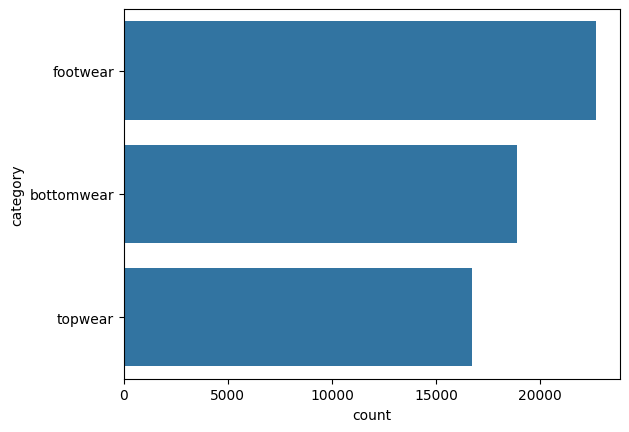

In [174]:
sns.countplot(fashion.category)
plt.show()

In [175]:
topwear = fashion[fashion['category'] == 'topwear'].reset_index(drop=True)
bottomwear = fashion[fashion['category'] == 'bottomwear'].reset_index(drop=True)
footwear = fashion[fashion['category'] == 'footwear'].reset_index(drop=True)

In [180]:
def download_images(dataframe, target_folder):  
    """
    Download images by using the URL and save it locally.
    """
    embeddings_dir = "embeddings_train_data"
    data = list()
    if not os.path.exists(embeddings_dir):
        os.mkdir(embeddings_dir)

    for i, row in tqdm(dataframe.iterrows(), total=dataframe.shape[0]):
        try:
            product_url, product_name = row["product"], row["product"].split("/")[-1]
            scene_url, scene_name = row["scene"], row["scene"].split("/")[-1]
            target_dir = os.path.join(embeddings_dir, target_folder)

            if not os.path.exists(target_dir):
                os.makedirs(os.path.join(target_dir, "anchor"), exist_ok=True)
                os.makedirs(os.path.join(target_dir, "positive"), exist_ok=True)

            anchor_path = os.path.join(target_dir, "anchor", product_name)
            positive_path = os.path.join(target_dir, "positive", scene_name)

            # Download and save anchor image
            if not os.path.isfile(anchor_path):
                product_img = Image.open(urllib.request.urlopen(product_url)).convert("RGB")
                product_img.save(anchor_path)

            # Download, crop, and save scene (positive) image
            if not os.path.isfile(positive_path):
                scene_img = Image.open(urllib.request.urlopen(scene_url)).convert("RGB")
                scene_np = np.array(scene_img)

                h, w = scene_np.shape[:2]
                XMIN, YMIN = int(w * row['XMIN']), int(h * row['YMIN'])
                XMAX, YMAX = int(w * row['XMAX']), int(h * row['YMAX'])

                cropped = Image.fromarray(scene_np[YMIN:YMAX, XMIN:XMAX])
                cropped.save(positive_path)

            data.append((anchor_path, positive_path))
        except Exception as e:
            print(f"Error: {e}")
            continue

    return data


def create_negative(file_list, positive):
    """
    Select a random image from the same category that will act as a negative sample.
    """
    negative = random.choice(file_list)
    return negative if negative != positive else create_negative(file_list, positive)


def plot_samples(dataframe, size=4, random_state=4):
    """
    Plot Anchor, Positive and Negative images in a row for a given batch of images.
    """
    for _, row in dataframe.sample(n=size, random_state=random_state).iterrows():
        anchor = np.array(Image.open(row["anchor"]).convert("RGB"))
        positive = np.array(Image.open(row["positive"]).convert("RGB"))
        negative = np.array(Image.open(row["negative"]).convert("RGB"))

        plt.figure(figsize=(16, 9))
        plt.subplot(131)
        plt.imshow(anchor)
        plt.axis("off"); plt.title("Anchor")

        plt.subplot(132)
        plt.imshow(positive)
        plt.axis("off"); plt.title("Positive")

        plt.subplot(133)
        plt.imshow(negative)
        plt.axis("off"); plt.title("Negative")

        plt.show()


In [183]:
top_pairs = download_images(topwear, "topwear")

 36%|███▌      | 6050/16745 [00:00<00:00, 31278.63it/s]

Error: HTTP Error 403: Forbidden


 55%|█████▍    | 9178/16745 [00:00<00:00, 7907.04it/s] 

Error: HTTP Error 403: Forbidden
Error: HTTP Error 403: Forbidden


100%|██████████| 16745/16745 [02:19<00:00, 120.43it/s]  


In [184]:
top_pairs_csv = pd.DataFrame(top_pairs, columns=["anchor", "positive"])
top_pairs_csv["negative"] = top_pairs_csv["positive"].apply(lambda x: create_negative(top_pairs_csv.positive.to_list(), x)) 
print("Total Pairs: ", top_pairs_csv.shape[0])
top_pairs_csv.to_csv("top_pairs.csv", index=False)

Total Pairs:  16742


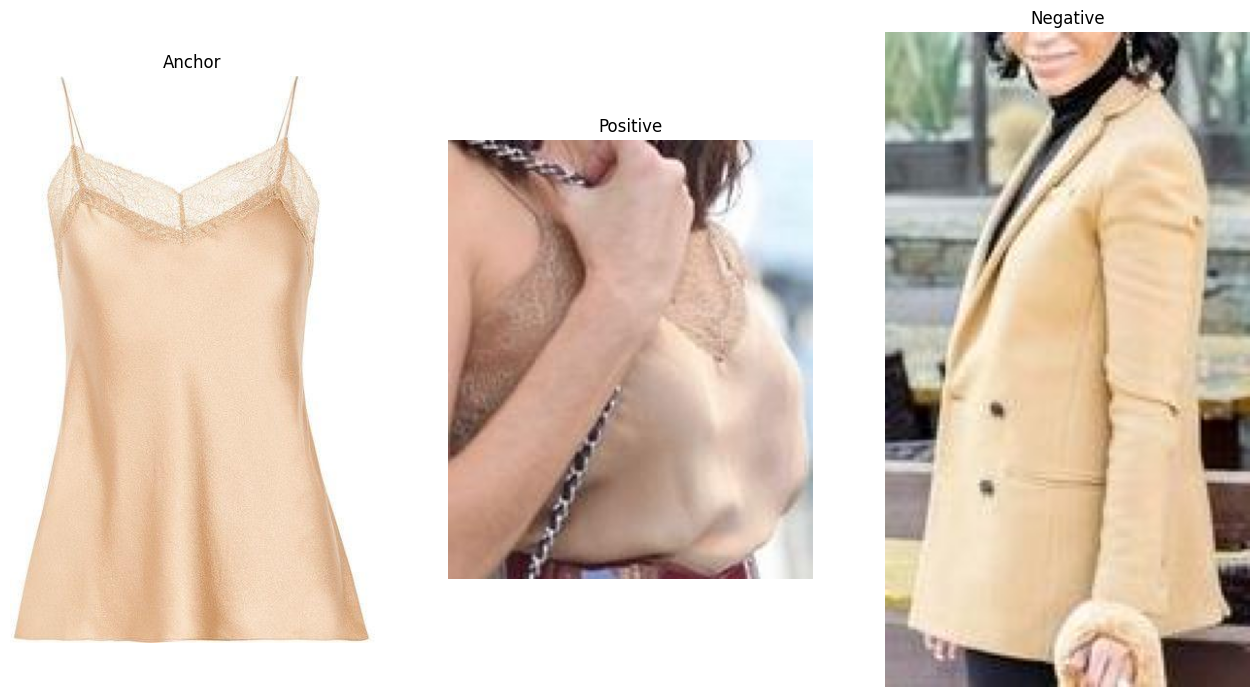

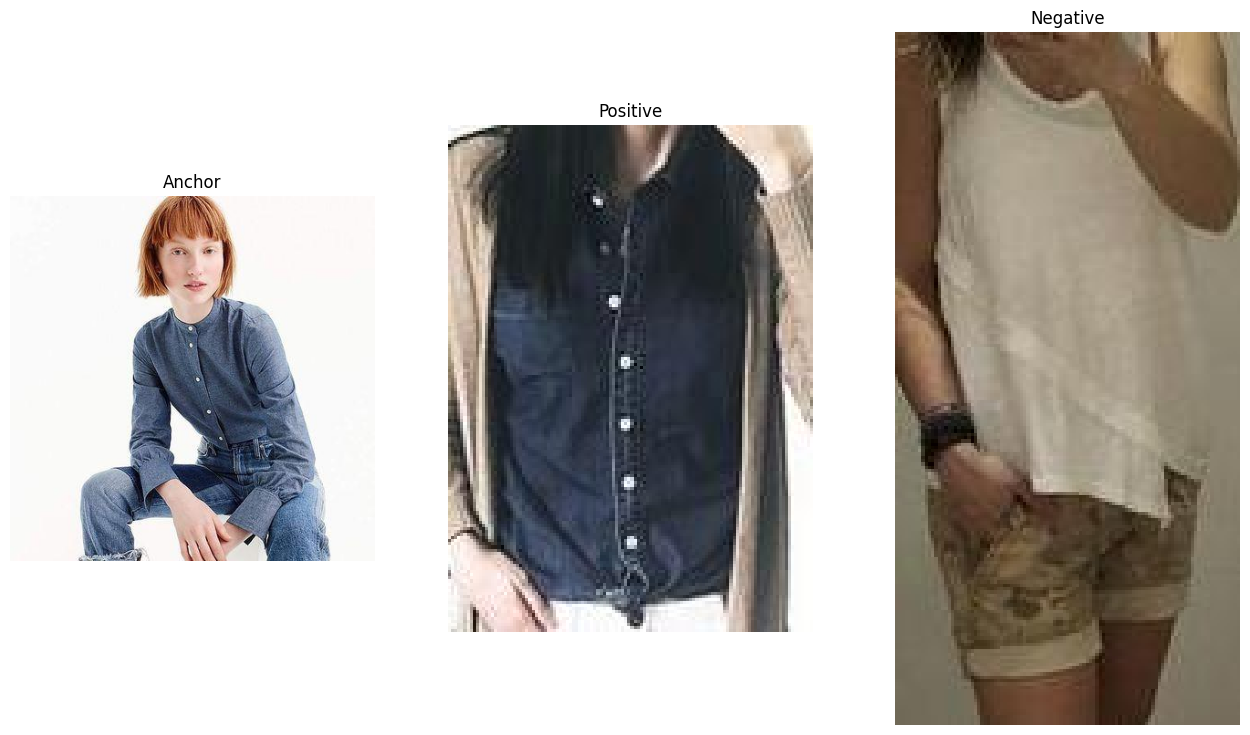

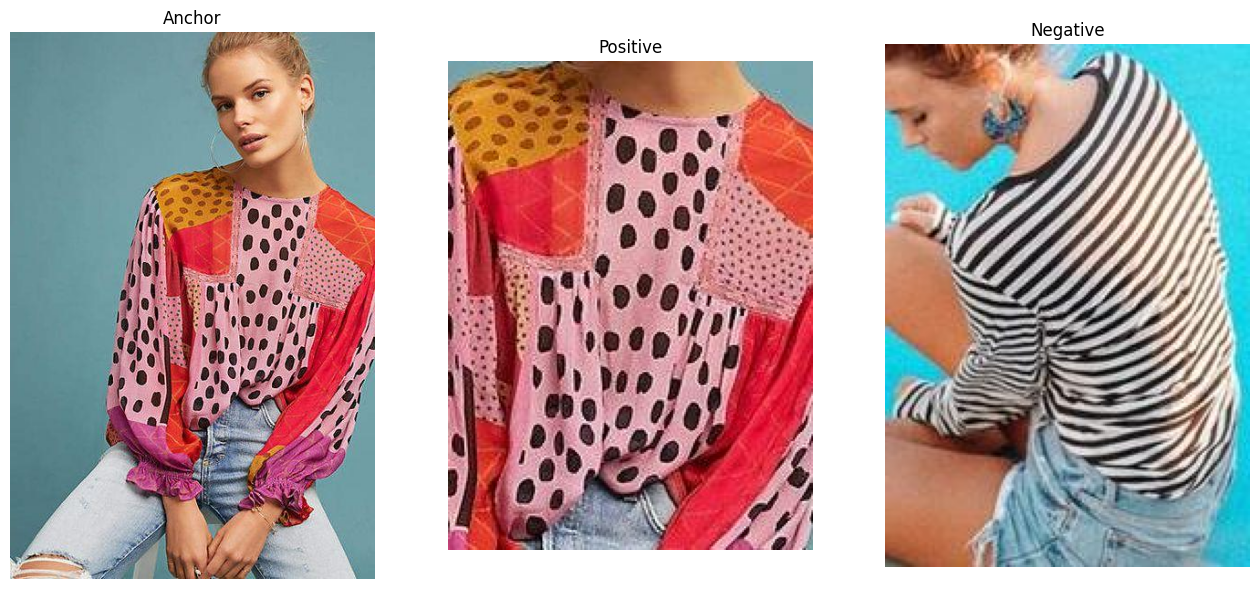

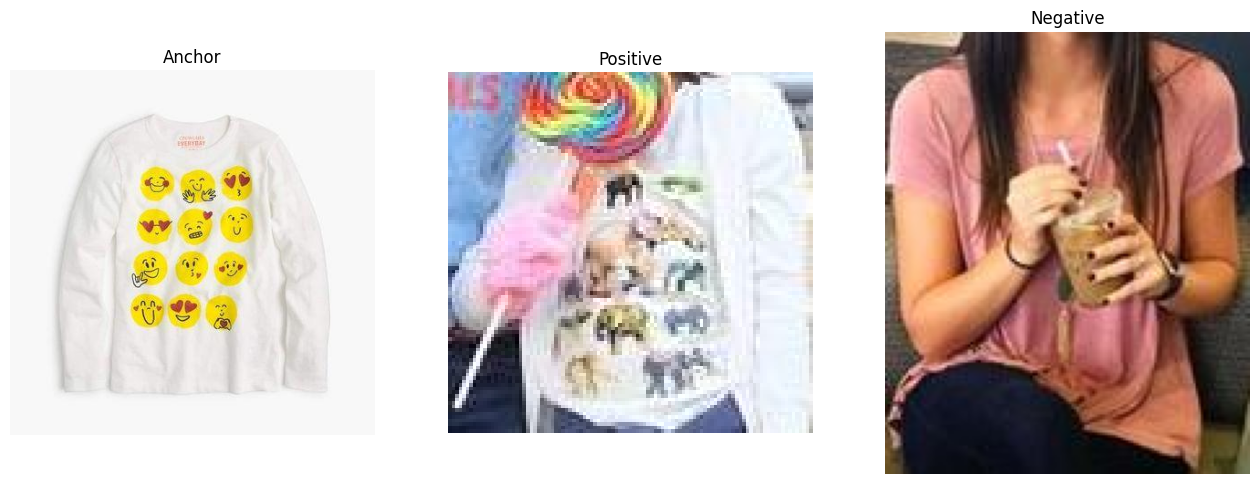

In [185]:
plot_samples(top_pairs_csv)

In [190]:
bottom_pairs = download_images(bottomwear, "bottomwear")

 20%|██        | 3819/18913 [00:00<00:01, 11663.35it/s]

Error: HTTP Error 403: Forbidden


 34%|███▍      | 6444/18913 [00:00<00:01, 8898.22it/s] 

Error: HTTP Error 403: Forbidden


 61%|██████    | 11455/18913 [00:01<00:00, 12512.42it/s]

Error: HTTP Error 403: Forbidden


 77%|███████▋  | 14500/18913 [00:01<00:00, 8849.95it/s] 

Error: HTTP Error 403: Forbidden
Error: HTTP Error 403: Forbidden


100%|██████████| 18913/18913 [06:33<00:00, 48.04it/s]  


In [191]:
bottom_pairs_csv = pd.DataFrame(bottom_pairs, columns=["anchor", "positive"])
bottom_pairs_csv["negative"] = bottom_pairs_csv["positive"].apply(lambda x: create_negative(bottom_pairs_csv.positive.to_list(), x))
print("Total Pairs: ", bottom_pairs_csv.shape[0])
bottom_pairs_csv.to_csv("bottom_pairs.csv", index=False)

Total Pairs:  18908


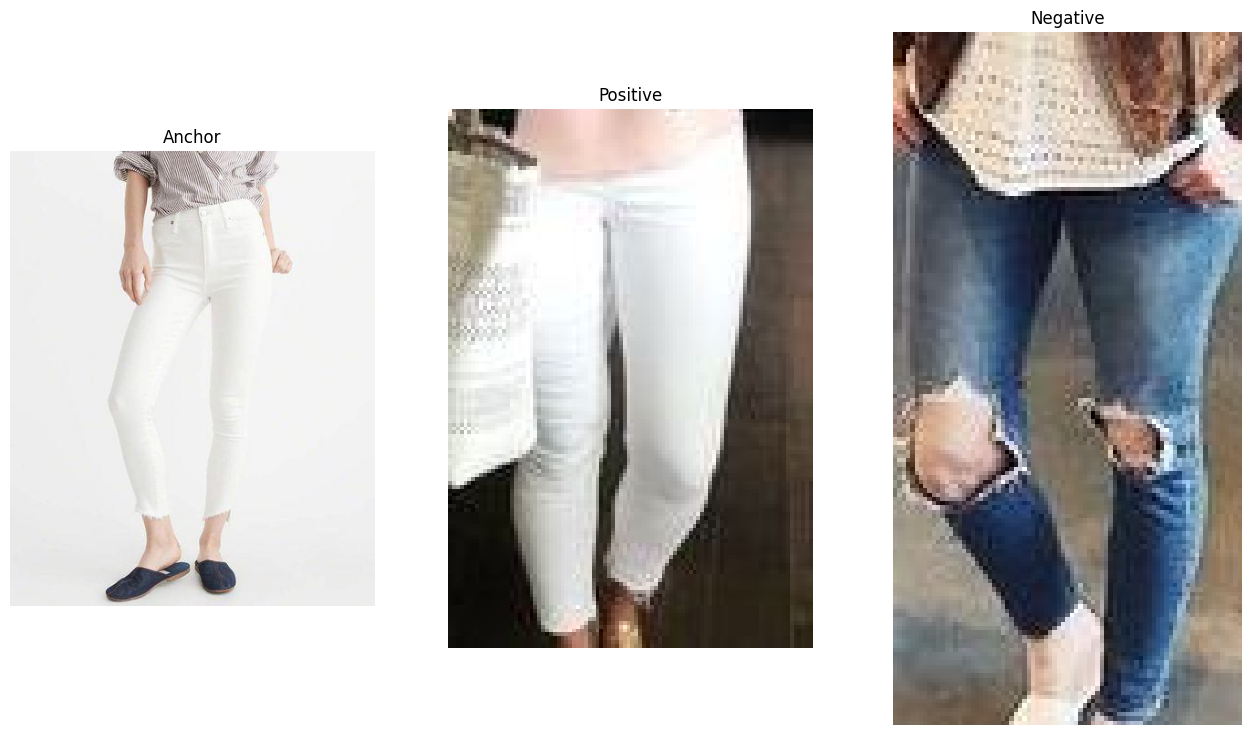

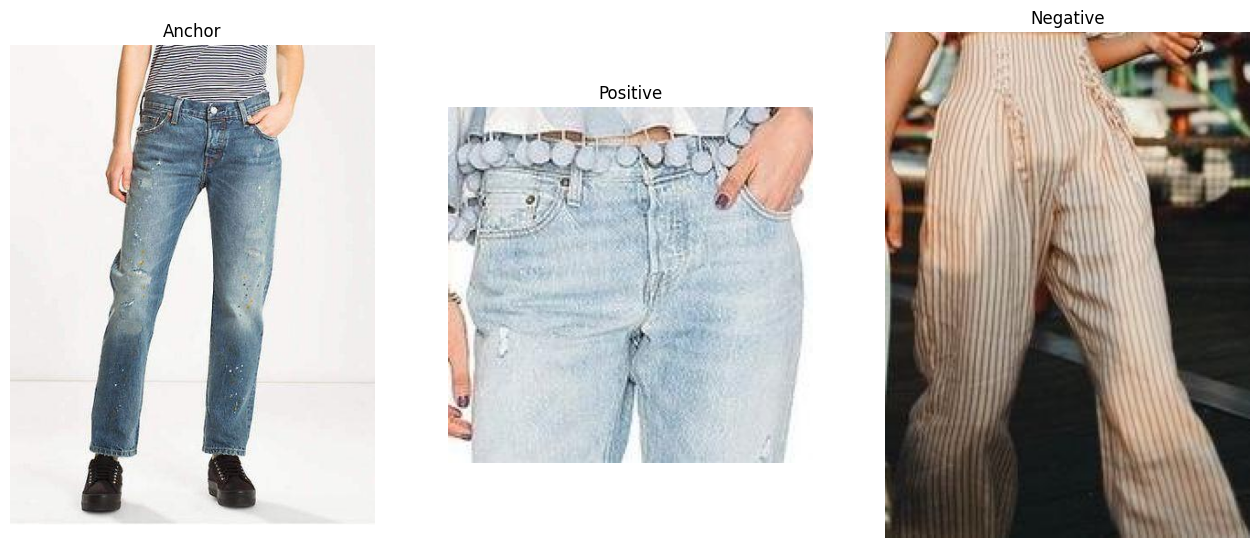

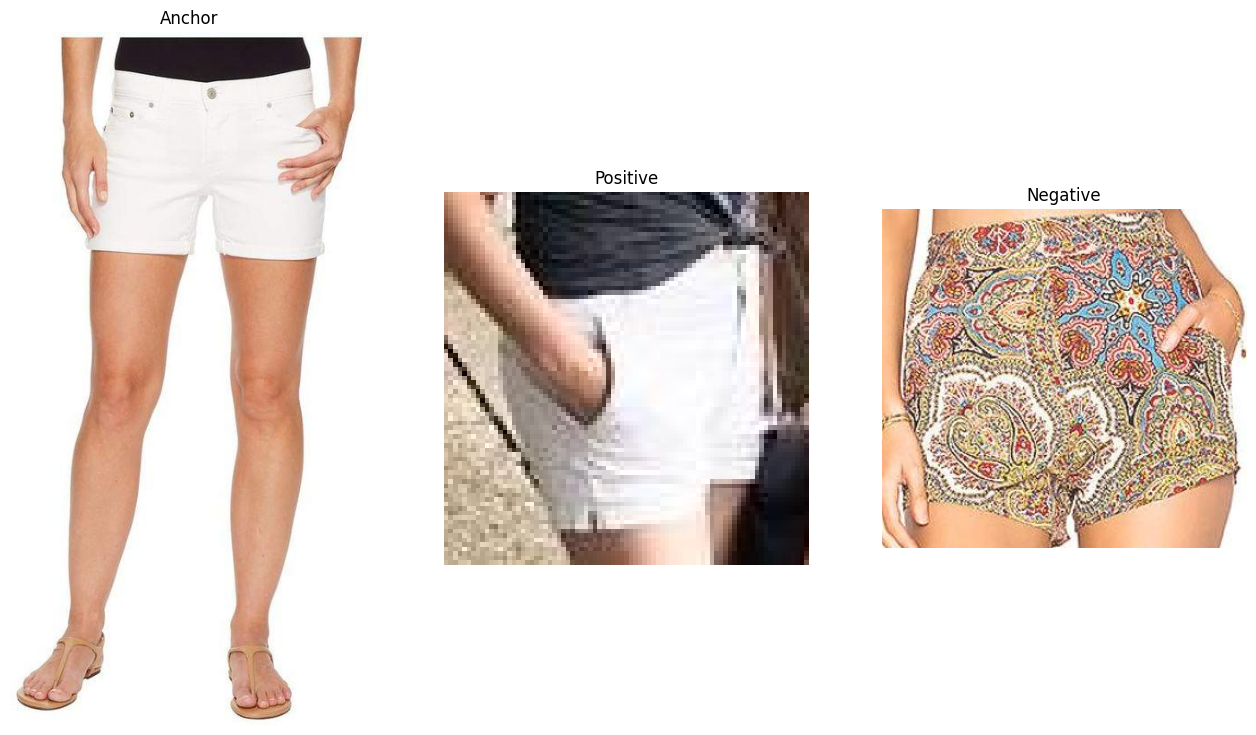

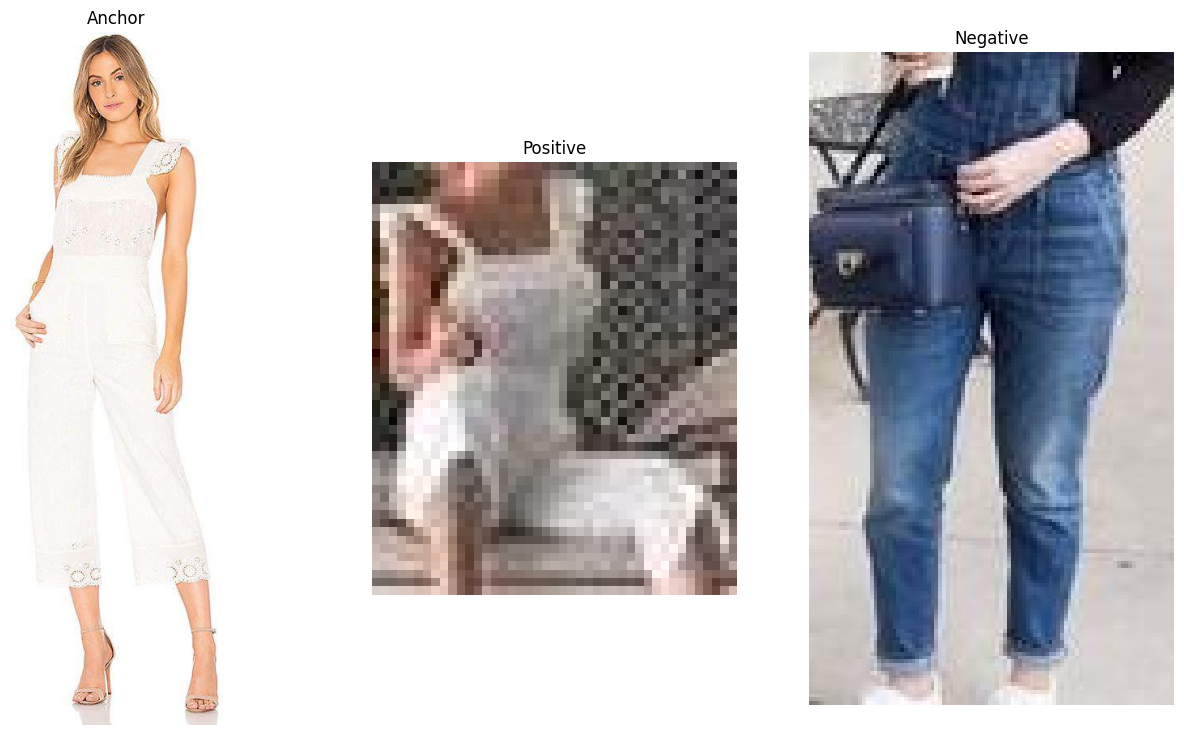

In [196]:
plot_samples(bottom_pairs_csv, random_state=44)

In [200]:
foot_pairs = download_images(footwear, "footwear")

  7%|▋         | 1568/22706 [00:00<00:06, 3369.37it/s]

Error: HTTP Error 403: Forbidden


 17%|█▋        | 3945/22706 [00:00<00:03, 5610.85it/s]

Error: HTTP Error 403: Forbidden


 63%|██████▎   | 14398/22706 [00:01<00:00, 13953.19it/s]

Error: HTTP Error 403: Forbidden


 85%|████████▍ | 19274/22706 [00:01<00:00, 13334.70it/s]

Error: HTTP Error 403: Forbidden


100%|██████████| 22706/22706 [03:00<00:00, 125.74it/s]  


In [201]:
foot_pairs_csv = pd.DataFrame(foot_pairs, columns=["anchor", "positive"])
foot_pairs_csv["negative"] = foot_pairs_csv["positive"].apply(lambda x: create_negative(foot_pairs_csv.positive.to_list(), x))
print("Total Pairs: ", foot_pairs_csv.shape[0])
foot_pairs_csv.to_csv("foot_pairs.csv", index=False)

Total Pairs:  22702


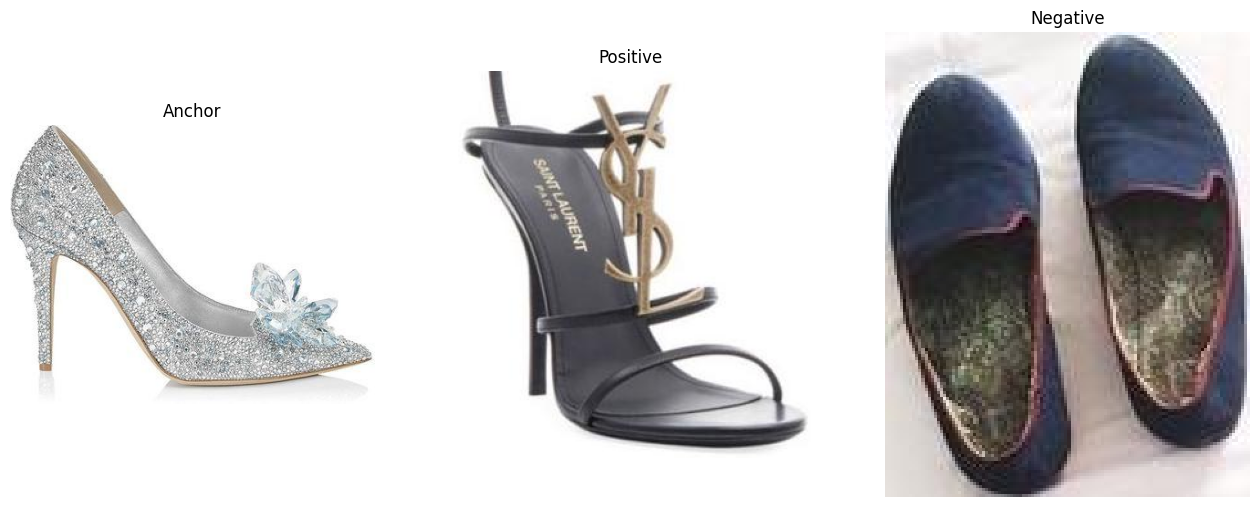

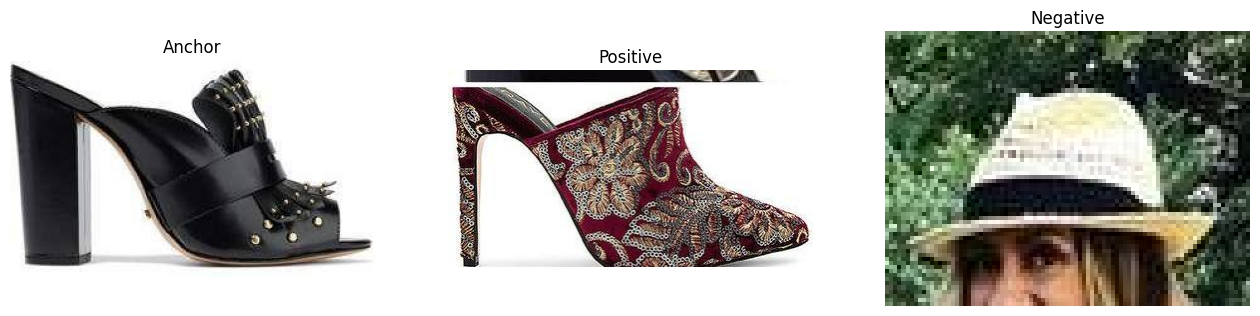

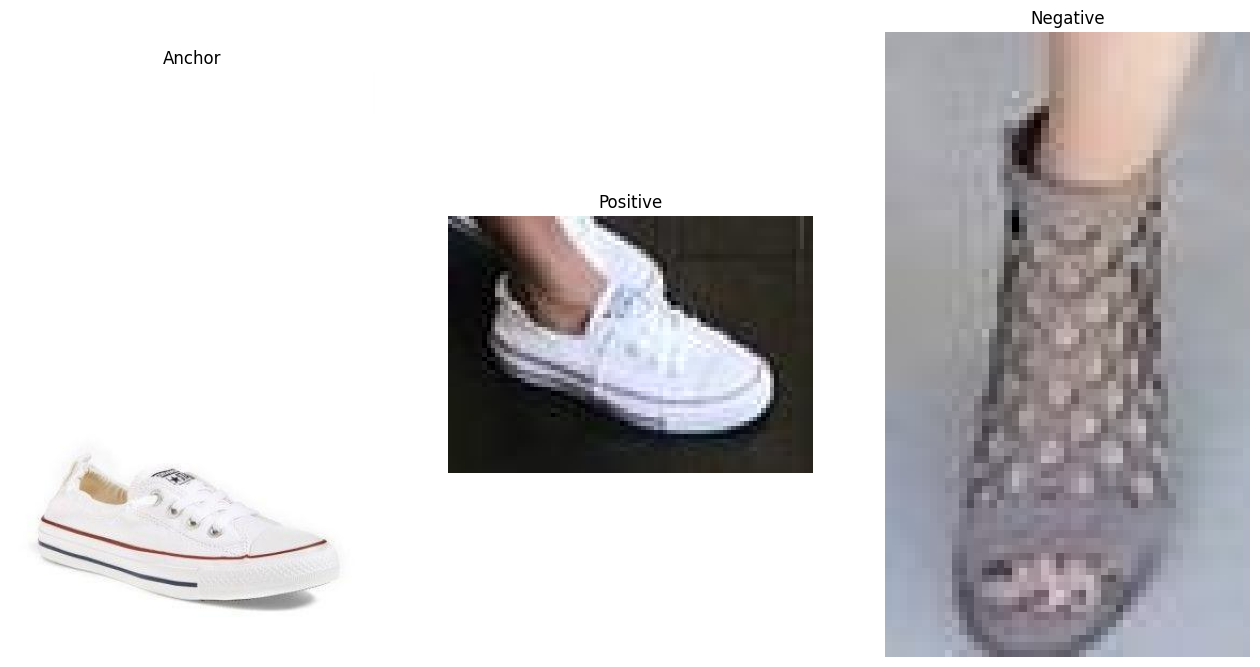

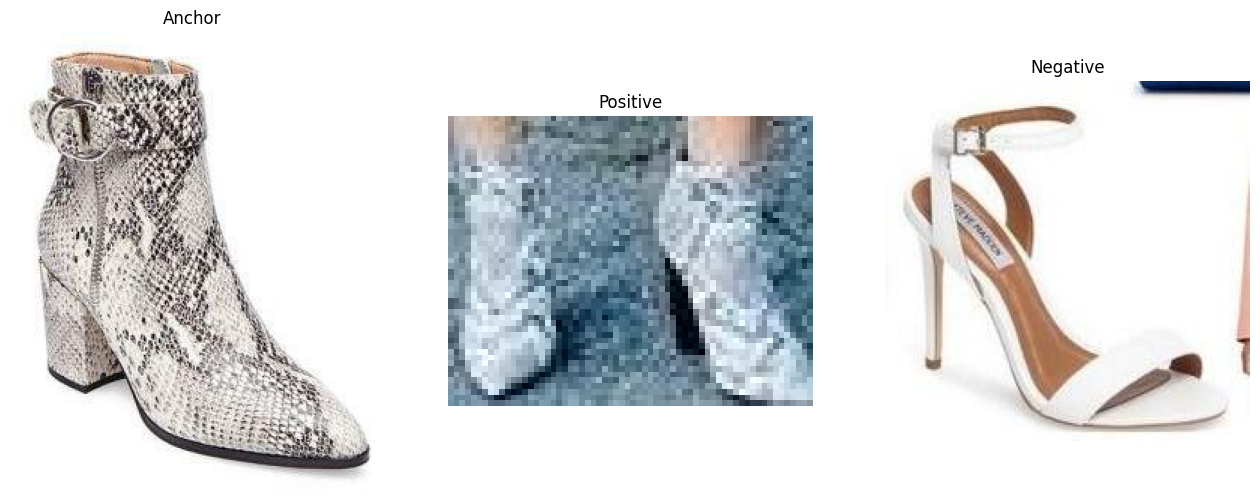

In [204]:
plot_samples(foot_pairs_csv, random_state=44)